Importing The Required Libraries

In [ ]:
import pandas as pd
import re
import string
import numpy as np

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
interview = pd.read_excel('/mnt/c/Users/Ashwin/Documents/Ash/Projects/NLP/Data/Journalist_Speech.xlsx')
interview.head()

,Journalist,Speech
0,Arnab Goswami,well you know I represent a new kind of\njourn...
1,Ravish Kumar,you analyze all kinds of messages coming\nfrom...
2,Barkha Dutt,hello and welcome to a special series\nkeeping...
3,Rajdeep Sardesai,you know you've had a phenomenal career\nyou'v...
4,Frank Rausan Pereira,very good evening my name is sharon\nsitti you...


Defining a Function that uses regular expressions to
1. Remove Bracketed words
2. Remove Punctuations
3. Remove Numerics

In [ ]:
def preprocess(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text) ### Remove transcript brackets
  text = re.sub(r'[^a-z0-9 ]+','',text) ###Remove special char
  text = re.sub(r'^\s+|\s+$',' ', text) ###Remove additional white sapces
  text = re.sub("\d+", "", text)
  return text

clean = lambda x: preprocess(x)

In [ ]:
clean_interview = pd.DataFrame(interview['Speech'].apply(clean))

In [ ]:
clean_interview.head()

,Speech
0,well you know i represent a new kind of\njourn...
1,you analyze all kinds of messages coming\nfrom...
2,hello and welcome to a special series\nkeeping...
3,you know youve had a phenomenal career\nyouve ...
4,very good evening my name is sharon\nsitti you...


Cleaning the Data further by removing stopwords

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
clean_interview['Speech'] = clean_interview['Speech'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_interview

,Speech
0,well know represent new kind journalism come i...
1,analyze kinds messages coming whatsapp take ti...
2,hello welcome special series keeping simple br...
3,know youve phenomenal career youve seen chroni...
4,good evening name sharon sitti youre watching ...


Third round of Preprocessing by appling the stemming operation

In [ ]:
#importing the lemmatizer function from nltk library
from nltk.stem import WordNetLemmatizer
#defining the object for stemming
lemmatizer = WordNetLemmatizer()

Defining a function for stemming

In [ ]:
def stem(text):
  text = text.split()
  text= [lemmatizer.lemmatize(word) for word in text]
  text = ' '.join(text)
  return text

st = lambda x: stem(x)

In [ ]:
clean_interview['Speech'] = clean_interview['Speech'].apply(st)
clean_interview

,Speech
0,well know represent new kind journalism come i...
1,analyze kind message coming whatsapp take time...
2,hello welcome special series keeping simple br...
3,know youve phenomenal career youve seen chroni...
4,good evening name sharon sitti youre watching ...


In [ ]:
Journalist = ['Arnab Goswami','Ravish Kumar','Barkha Dutt','Rajdeep Sardesai','Frank Rausan Pereira']
clean_interview['Journalist'] = Journalist

In [ ]:
clean_interview.head()

,Speech,Journalist
0,well know represent new kind journalism come i...,Arnab Goswami
1,analyze kind message coming whatsapp take time...,Ravish Kumar
2,hello welcome special series keeping simple br...,Barkha Dutt
3,know youve phenomenal career youve seen chroni...,Rajdeep Sardesai
4,good evening name sharon sitti youre watching ...,Frank Rausan Pereira


Making a document term matrix uning CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Saving the Document Matrix as a DataFrame

In [ ]:
vectorizer = CountVectorizer()
data_cv = vectorizer.fit_transform(clean_interview.Speech)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=vectorizer.get_feature_names())
data_dtm.index = clean_interview['Journalist']
data_dtm


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abdullah,ability,able,abreast,absolutely,absorb,abused,academic,accept,acceptance,...,young,younger,youngster,youre,youth,youve,yupi,zakir,zealand,zone
Journalist,,,,,,,,,,,,,,,,,,,,,
Arnab Goswami,0,0,0,0,0,0,1,0,1,0,...,1,0,0,10,0,1,0,0,0,0
Ravish Kumar,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,9,2,0,0,0,0
Barkha Dutt,1,0,0,0,0,0,0,0,0,1,...,0,0,0,3,0,4,0,1,0,0
Rajdeep Sardesai,0,2,9,1,1,0,0,0,0,0,...,11,4,4,10,3,20,3,0,0,2
Frank Rausan Pereira,0,0,0,0,0,3,0,2,0,0,...,1,0,0,3,1,0,0,0,1,0


In [ ]:
eda_interview = data_dtm.transpose()
eda_interview.head()

Journalist,Arnab Goswami,Ravish Kumar,Barkha Dutt,Rajdeep Sardesai,Frank Rausan Pereira
abdullah,0,0,1,0,0
ability,0,0,0,2,0
able,0,2,0,9,0
abreast,0,0,0,1,0
absolutely,0,0,0,1,0


Basic EDA

In [ ]:
top_dict = {}
for c in eda_interview.columns:
    top = eda_interview[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Arnab Goswami': [('question', 22),
  ('know', 20),
  ('people', 18),
  ('like', 17),
  ('india', 14),
  ('medium', 13),
  ('say', 13),
  ('fact', 13),
  ('journalism', 12),
  ('country', 11),
  ('youre', 10),
  ('bobby', 10),
  ('im', 9),
  ('group', 9),
  ('one', 9),
  ('want', 9),
  ('right', 9),
  ('political', 8),
  ('dont', 8),
  ('case', 8),
  ('seen', 8),
  ('thing', 8),
  ('ask', 8),
  ('number', 8),
  ('let', 8),
  ('weve', 7),
  ('story', 7),
  ('thats', 7),
  ('way', 7),
  ('therefore', 7)],
 'Barkha Dutt': [('kashmir', 17),
  ('jammu', 16),
  ('minister', 15),
  ('thing', 15),
  ('right', 14),
  ('got', 14),
  ('prime', 12),
  ('bjp', 12),
  ('one', 10),
  ('fact', 10),
  ('going', 8),
  ('even', 8),
  ('kashmiri', 8),
  ('think', 7),
  ('actually', 7),
  ('pakistan', 7),
  ('seen', 7),
  ('decision', 6),
  ('wrong', 6),
  ('sense', 6),
  ('issue', 6),
  ('modi', 6),
  ('could', 6),
  ('messaging', 6),
  ('national', 6),
  ('people', 6),
  ('four', 6),
  ('mainstream', 6)

In [ ]:
for topf, top_words in top_dict.items():
    print(topf)
    print(', '.join([word for word, count in top_words[0:18]]))
    print('---')

Arnab Goswami
question, know, people, like, india, medium, say, fact, journalism, country, youre, bobby, im, group, one, want, right, political
---
Ravish Kumar
medium, also, day, indian, democracy, like, great, life, one, write, news, bad, kind, question, name, word, machine, newspaper
---
Barkha Dutt
kashmir, jammu, minister, thing, right, got, prime, bjp, one, fact, going, even, kashmiri, think, actually, pakistan, seen, decision
---
Rajdeep Sardesai
know, think, one, time, year, journalist, news, youve, dont, going, im, digital, day, people, life, new, television, sort
---
Frank Rausan Pereira
know, much, well, got, uh, time, thats, tv, always, christ, journalism, right, one, system, wanted, good, thing, back
---


In [ ]:
from collections import Counter

words = []
for Journalist in eda_interview.columns:
    top = [word for (word, count) in top_dict[Journalist]]
    for t in top:
        words.append(t)

words

['question',
 'know',
 'people',
 'like',
 'india',
 'medium',
 'say',
 'fact',
 'journalism',
 'country',
 'youre',
 'bobby',
 'im',
 'group',
 'one',
 'want',
 'right',
 'political',
 'dont',
 'case',
 'seen',
 'thing',
 'ask',
 'number',
 'let',
 'weve',
 'story',
 'thats',
 'way',
 'therefore',
 'medium',
 'also',
 'day',
 'indian',
 'democracy',
 'like',
 'great',
 'life',
 'one',
 'write',
 'news',
 'bad',
 'kind',
 'question',
 'name',
 'word',
 'machine',
 'newspaper',
 'every',
 'youth',
 'need',
 'real',
 'process',
 'people',
 'business',
 'first',
 'dont',
 'thousand',
 'democratic',
 'yes',
 'kashmir',
 'jammu',
 'minister',
 'thing',
 'right',
 'got',
 'prime',
 'bjp',
 'one',
 'fact',
 'going',
 'even',
 'kashmiri',
 'think',
 'actually',
 'pakistan',
 'seen',
 'decision',
 'wrong',
 'sense',
 'issue',
 'modi',
 'could',
 'messaging',
 'national',
 'people',
 'four',
 'mainstream',
 'new',
 'government',
 'know',
 'think',
 'one',
 'time',
 'year',
 'journalist',
 'news'

In [ ]:
Counter(words).most_common()

[('one', 5),
 ('people', 4),
 ('know', 3),
 ('journalism', 3),
 ('right', 3),
 ('dont', 3),
 ('thing', 3),
 ('thats', 3),
 ('question', 2),
 ('like', 2),
 ('medium', 2),
 ('fact', 2),
 ('im', 2),
 ('want', 2),
 ('seen', 2),
 ('way', 2),
 ('also', 2),
 ('day', 2),
 ('life', 2),
 ('news', 2),
 ('kind', 2),
 ('every', 2),
 ('need', 2),
 ('got', 2),
 ('going', 2),
 ('think', 2),
 ('could', 2),
 ('new', 2),
 ('time', 2),
 ('really', 2),
 ('tv', 2),
 ('india', 1),
 ('say', 1),
 ('country', 1),
 ('youre', 1),
 ('bobby', 1),
 ('group', 1),
 ('political', 1),
 ('case', 1),
 ('ask', 1),
 ('number', 1),
 ('let', 1),
 ('weve', 1),
 ('story', 1),
 ('therefore', 1),
 ('indian', 1),
 ('democracy', 1),
 ('great', 1),
 ('write', 1),
 ('bad', 1),
 ('name', 1),
 ('word', 1),
 ('machine', 1),
 ('newspaper', 1),
 ('youth', 1),
 ('real', 1),
 ('process', 1),
 ('business', 1),
 ('first', 1),
 ('thousand', 1),
 ('democratic', 1),
 ('yes', 1),
 ('kashmir', 1),
 ('jammu', 1),
 ('minister', 1),
 ('prime', 1),
 (

In [ ]:
### Additional Stop Words
stop_words = [word for word, count in Counter(words).most_common() if count > 2  ]
stop_words

['one', 'people', 'know', 'journalism', 'right', 'dont', 'thing', 'thats']

Creating a New Document-Term Matrix eliminating the above stopwords

In [ ]:
from sklearn.feature_extraction import text


new_stopwords = text.ENGLISH_STOP_WORDS.union(stop_words)


vectorizer = CountVectorizer(stop_words = stop_words)
data_cv = vectorizer.fit_transform(clean_interview.Speech)
new_data_dtm = pd.DataFrame(data_cv.toarray(), columns=vectorizer.get_feature_names())
new_data_dtm.index = clean_interview['Journalist']
new_data_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abdullah,ability,able,abreast,absolutely,absorb,abused,academic,accept,acceptance,...,young,younger,youngster,youre,youth,youve,yupi,zakir,zealand,zone
Journalist,,,,,,,,,,,,,,,,,,,,,
Arnab Goswami,0,0,0,0,0,0,1,0,1,0,...,1,0,0,10,0,1,0,0,0,0
Ravish Kumar,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,9,2,0,0,0,0
Barkha Dutt,1,0,0,0,0,0,0,0,0,1,...,0,0,0,3,0,4,0,1,0,0
Rajdeep Sardesai,0,2,9,1,1,0,0,0,0,0,...,11,4,4,10,3,20,3,0,0,2
Frank Rausan Pereira,0,0,0,0,0,3,0,2,0,0,...,1,0,0,3,1,0,0,0,1,0


Creating a WordCloud

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid", color_codes=True)

In [ ]:
names = ['Arnab Goswami','Ravish Kumar','Barkha Dutt','Rajdeep Sardesai','Frank Rausan Pereira']

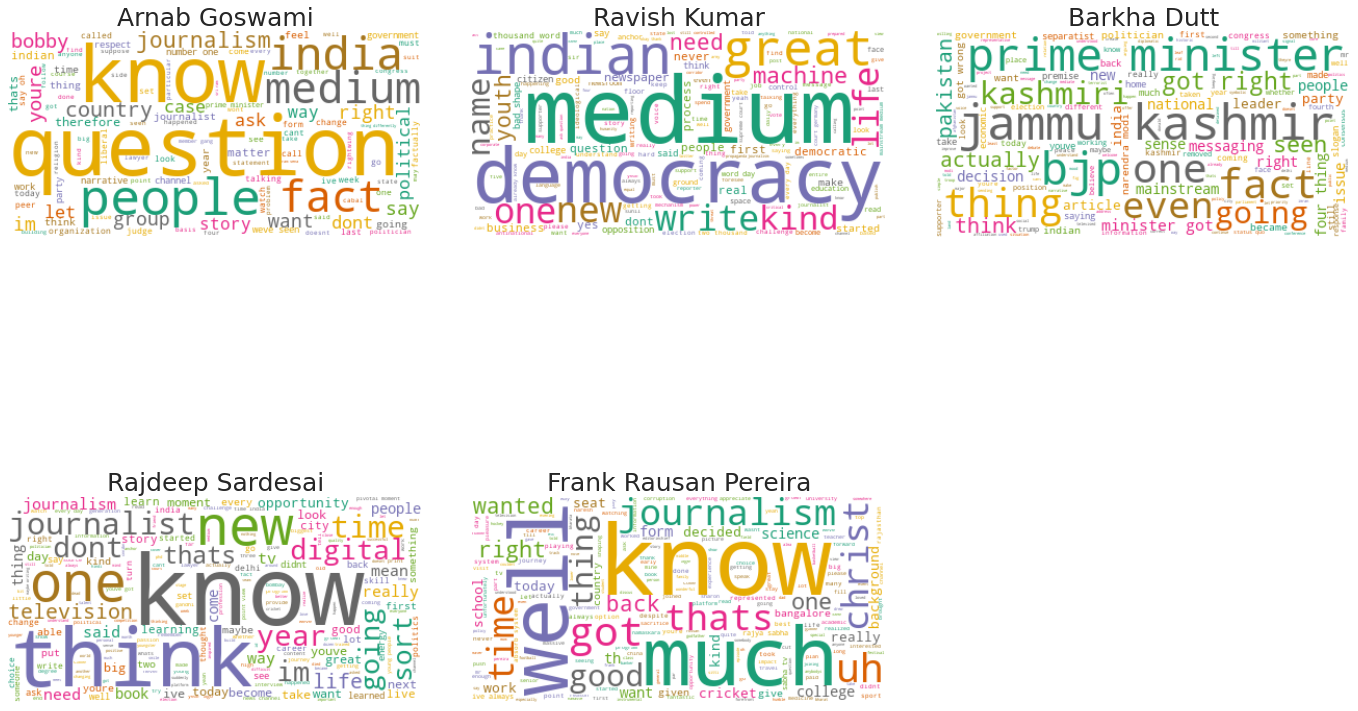

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
text1 = clean_interview.Speech[0]
wordcloud1 = WordCloud(background_color='white',colormap='Dark2').generate(text1)
plt.title('Arnab Goswami',fontsize=25)
plt.axis("off")
plt.imshow(wordcloud1, interpolation='bilinear')

plt.subplot(2,3,2)
text2 = clean_interview.Speech[1]
wordcloud2 = WordCloud(background_color='white',colormap='Dark2').generate(text2)
plt.title('Ravish Kumar',fontsize=25)
plt.axis("off")
plt.imshow(wordcloud2, interpolation='bilinear')


plt.subplot(2,3,3)
text3 = clean_interview.Speech[2]
wordcloud3 = WordCloud(background_color='white',colormap='Dark2').generate(text3)
plt.title('Barkha Dutt',fontsize=25)
plt.axis("off")
plt.imshow(wordcloud3, interpolation='bilinear')


plt.subplot(2,3,4)
text4 = clean_interview.Speech[3]
wordcloud4 = WordCloud(background_color='white',colormap='Dark2').generate(text4)
plt.title('Rajdeep Sardesai',fontsize=25)
plt.axis("off")
plt.imshow(wordcloud4, interpolation='bilinear')


plt.subplot(2,3,5)
text5 = clean_interview.Speech[4]
wordcloud5 = WordCloud(background_color='white',colormap='Dark2').generate(text5)
plt.title('Frank Rausan Pereira',fontsize=25)
plt.axis("off")
plt.imshow(wordcloud5, interpolation='bilinear')


plt.tight_layout(pad=4.0)
plt.show()

# Analyzing the stance of each Journalist by using the TexBlob module



**Polarity:** How positive or negative a word is. -1 is very negative. +1 is very positive.

**Subjectivity:** How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [ ]:
import plotly.express as px

In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

clean_interview['polarity'] = clean_interview['Speech'].apply(pol)
clean_interview['subjectivity'] = clean_interview['Speech'].apply(sub)
clean_interview

,Speech,Journalist,polarity,subjectivity
0,well know represent new kind journalism come i...,Arnab Goswami,0.076460,0.437294
1,analyze kind message coming whatsapp take time...,Ravish Kumar,0.162142,0.475253
2,hello welcome special series keeping simple br...,Barkha Dutt,0.076471,0.402709
3,know youve phenomenal career youve seen chroni...,Rajdeep Sardesai,0.151709,0.481087
4,good evening name sharon sitti youre watching ...,Frank Rausan Pereira,0.182702,0.431481


In [ ]:
px.scatter(clean_interview,x = 'polarity',y='subjectivity',color ='Journalist',
           labels={
                     "polarity": "<--Negative :: Positive--> (polarity)",
                     "subjectivity": "<--Facts :: Opinions--> (subjectivity)",
                     "species": "Species of Iris"
                 },template='ggplot2',title="Sentiment Analysis")

**Findings**


In [ ]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''


    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
list_pieces = []
for t in clean_interview['Speech']:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['well know represent new kind journalism come india wherever there new form journalism come there always going clash way thing way thing problem people dont like form journalism largely among peer still belong old form journalism didnt want see change saw change happened around two thousand seven eightnine time spearheaded change refused follow rule set someone journalism year back mean disrespect like id like thing way well mean say know kind journalism done broken story matter india last ten year take story indian social fabric would big exclusive story journalist fact think others journalism feel unverified complaint fact robust radar criticism bjp issue need criticized recently job know though cut wire rape case tore ruling dispensation ',
  'state government apart broken big story government elected lalit gate consistently weve weve front footing story require accountability know bobby cant cant reverse engineering dont journalism say oh ive got antibjp let reverse engineering f

In [ ]:
polarity_Speech = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_Speech.append(polarity_piece)

polarity_Speech

[[0.03095914502164503,
  0.0569047619047619,
  0.20867346938775508,
  0.10535714285714287,
  0.05510204081632654,
  0.08285714285714288,
  0.09047619047619047,
  0.11150793650793651,
  0.05523809523809524,
  0.027380952380952395],
 [0.2795807453416149,
  0.14360795454545455,
  0.16177777777777777,
  0.2306418219461698,
  0.28348214285714285,
  0.37142857142857144,
  0.010744810744810773,
  -0.004761904761904742,
  0.1406114718614719,
  0.24469696969696972],
 [0.07521008403361343,
  0.08876050420168068,
  0.12841401023219204,
  -0.04543650793650794,
  0.049297924297924296,
  0.07999999999999999,
  0.07196969696969696,
  0.08965367965367964,
  0.046,
  0.19857142857142857],
 [0.19155200655200658,
  0.23349844599844602,
  0.15629849710038393,
  0.08943452380952381,
  0.10830534408120615,
  0.15538019079685744,
  0.19045698924731183,
  0.1945597484276729,
  0.03795351473922902,
  0.18148886827458255],
 [0.3633928571428572,
  0.21904761904761907,
  0.25,
  0.09444444444444444,
  0.247619047

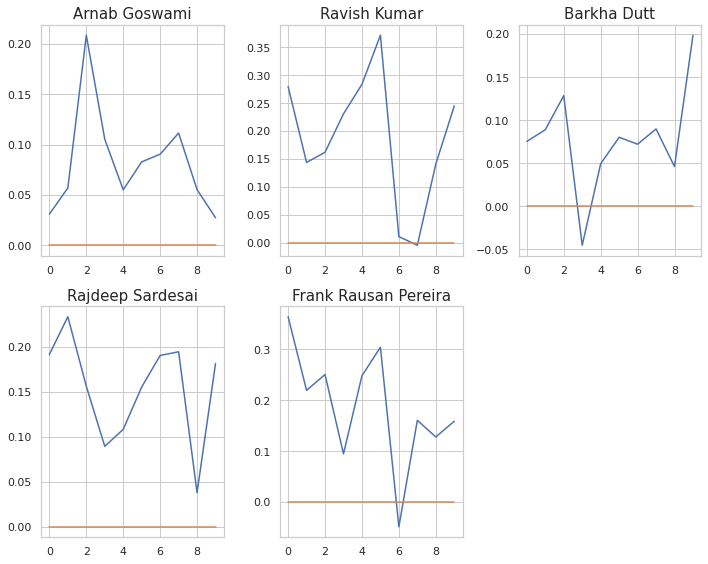

In [ ]:
sns.set(style="whitegrid", color_codes=True)

plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
plt.plot(polarity_Speech[0])
plt.title(clean_interview['Journalist'].index[0])
plt.plot(np.arange(0,10), np.zeros(10))
plt.title('Arnab Goswami',fontsize=15)

plt.subplot(2,3,2)
plt.plot(polarity_Speech[1])
plt.title(clean_interview['Journalist'].index[1])
plt.plot(np.arange(0,10), np.zeros(10))
plt.title('Ravish Kumar',fontsize=15)

plt.subplot(2,3,3)
plt.plot(polarity_Speech[2])
plt.title(clean_interview['Journalist'].index[2])
plt.plot(np.arange(0,10), np.zeros(10))
plt.title('Barkha Dutt',fontsize=15)

plt.subplot(2,3,4)
plt.plot(polarity_Speech[3])
plt.title(clean_interview['Journalist'].index[3])
plt.plot(np.arange(0,10), np.zeros(10))
plt.title('Rajdeep Sardesai',fontsize=15)

plt.subplot(2,3,5)
plt.plot(polarity_Speech[4])
plt.title(clean_interview['Journalist'].index[4])
plt.plot(np.arange(0,10), np.zeros(10))
plt.title('Frank Rausan Pereira',fontsize=15)

plt.tight_layout()

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 6.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=364ba713083e3dd0c2ac8c1c953462610eccddec994652d85272dfe04b6c7f58
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [ ]:
def sent_to_words(sentences):           ### Deac Removes Punctuations
  for sentence in sentences:
    yield(simple_preprocess(str(sentence)))

### Converting without stopwords column to a list of list
interview = clean_interview['Speech']
interview = list(sent_to_words(interview))

Gensim LDA Requires the data in a specific format, LDA requires the corpus to be in the form of a dictionary with words mapped as id whit their frequency.

In [ ]:
id2word = corpora.Dictionary(interview)

corpus = [id2word.doc2bow(text) for text in interview]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = id2word,
                                            num_topics=10,random_state=100,update_every=1,
                                            chunksize=100,passes=10,alpha=0.1,per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
import pprint
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.001*"know" + 0.001*"think" + 0.001*"day" + 0.001*"im" + 0.001*"one" + '
  '0.001*"journalism" + 0.001*"people" + 0.001*"medium" + 0.001*"also" + '
  '0.001*"great"'),
 (1,
  '0.016*"think" + 0.014*"know" + 0.010*"thing" + 0.010*"one" + 0.010*"got" + '
  '0.008*"right" + 0.008*"going" + 0.007*"minister" + 0.007*"kashmir" + '
  '0.006*"jammu"'),
 (2,
  '0.001*"know" + 0.001*"think" + 0.001*"thing" + 0.001*"one" + '
  '0.001*"kashmir" + 0.001*"minister" + 0.001*"got" + 0.001*"prime" + '
  '0.001*"jammu" + 0.001*"bjp"'),
 (3,
  '0.001*"know" + 0.001*"think" + 0.001*"one" + 0.001*"medium" + 0.001*"thing" '
  '+ 0.001*"time" + 0.001*"right" + 0.001*"year" + 0.001*"like" + 0.001*"day"'),
 (4,
  '0.014*"medium" + 0.010*"also" + 0.009*"day" + 0.008*"indian" + '
  '0.008*"democracy" + 0.007*"like" + 0.007*"great" + 0.007*"one" + '
  '0.007*"life" + 0.007*"write"'),
 (5,
  '0.001*"know" + 0.001*"think" + 0.001*"one" + 0.001*"medium" + '
  '0.001*"journalism" + 0.001*"day" + 0.001*"thing

In [ ]:
coherence = CoherenceModel(model = lda_model,texts = interview,dictionary = id2word , coherence ='c_v')
coherence_lda = coherence.get_coherence()
print(coherence_lda)

0.292594768448709


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.054924 -0.064743       1        1  28.300521
7      0.189602 -0.013141       2        1  25.145161
4     -0.044932  0.165680       3        1  21.859163
9      0.102723  0.079295       4        1  15.173319
8     -0.012133 -0.094946       5        1   9.487615
3     -0.055592 -0.012739       6        1   0.006844
2     -0.057604 -0.016290       7        1   0.006844
0     -0.057787 -0.015148       8        1   0.006844
5     -0.061753 -0.015341       9        1   0.006844
6     -0.057446 -0.012627      10        1   0.006844, topic_info=         Term        Freq       Total Category  logprob  loglift
236      know  162.000000  162.000000  Default  30.0000  30.0000
444     think  111.000000  111.000000  Default  29.0000  29.0000
347  question   32.000000   32.000000  Default  28.0000  28.0000
186       got   30.000000   30.000000  Default  27.0000  27.0000
277    medium   39.000000   39.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
503     youve    0.000296   25.297853  Topic10  -7.4305  -1.7657
500      year    0.000302   36.774966  Topic10  -7.4106  -2.1199
479      want    0.000299   30.385956  Topic10  -7.4219  -1.9404
130      dont    0.000298   34.884357  Topic10  -7.4241  -2.0806
440     thats    0.000297   31.203706  Topic10  -7.4272  -1.9722

[745 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
504       1  0.180679     able
504       2  0.632378     able
504       3  0.180679     able
1345      1  0.802113  abreast
1906      5  0.716908   absorb
...     ...       ...      ...
503       3  0.079058    youve
503       4  0.039529    youve
1904      2  0.864764     yupi
1343      1  0.805796    zakir
1905      2  0.805581     zone

[785 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 5, 10, 9, 4, 3, 1, 6, 7])

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):

    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics,
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))


    return model_list, coherence_values

In [ ]:
# build models across a range of num_topics and alpha
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 1]
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=interview,
                                                        num_topics_range=num_topics_range,
                                                        alpha_range=alpha_range)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.01,2,0.215600
1,0.01,6,0.219027
2,0.01,10,0.234809
3,0.01,15,0.218582
4,0.01,20,0.231601
5,0.10,2,0.195251
6,0.10,6,0.219559
7,0.10,10,0.229675
8,0.10,15,0.217505
9,0.10,20,0.223377


In [ ]:
fig2 = px.line(coherence_df, x="num_topics", y="coherence_value", color='alpha',template = 'ggplot2')
fig2.show()

In [ ]:
tune_lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = id2word,
                                            num_topics=2,random_state=100,update_every=1,
                                            chunksize=100,passes=10,alpha=0.1,per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
import pprint
pprint.pprint(tune_lda_model.print_topics())
doc_lda = tune_lda_model[corpus]

[(0,
  '0.010*"question" + 0.010*"know" + 0.009*"people" + 0.008*"like" + '
  '0.007*"india" + 0.006*"medium" + 0.006*"fact" + 0.006*"say" + '
  '0.006*"journalism" + 0.005*"country"'),
 (1,
  '0.021*"know" + 0.016*"think" + 0.009*"one" + 0.006*"time" + 0.006*"thing" + '
  '0.005*"day" + 0.005*"also" + 0.005*"life" + 0.005*"got" + 0.005*"year"')]


In [ ]:
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim_models.prepare(tune_lda_model,corpus,id2word)
vis2

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.060212  0.0       1        1  84.815728
0     -0.060212  0.0       2        1  15.184272, topic_info=         Term       Freq      Total Category  logprob  loglift
347  question  24.000000  24.000000  Default  30.0000  30.0000
322    people  38.000000  38.000000  Default  29.0000  29.0000
256      like  30.000000  30.000000  Default  28.0000  28.0000
213     india  25.000000  25.000000  Default  27.0000  27.0000
381       say  21.000000  21.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
309       one   4.971222  57.767285   Topic2  -5.4069  -0.5678
443     thing   4.432765  39.199764   Topic2  -5.5216  -0.2947
482       way   3.904959  21.485432   Topic2  -5.6483   0.1798
496     would   3.927917  27.492169   Topic2  -5.6425  -0.0609
440     thats   3.910648  28.363969   Topic2  -5.6469  -0.0965

[152 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2         2  0.580140  accidental
12        1  0.934812        also
12        2  0.060310        also
14        2  0.580128       among
16        2  0.580136        anti
...     ...       ...         ...
502       1  0.713756       youre
502       2  0.254913       youre
1025      1  1.012100       youth
503       1  0.977104       youve
503       2  0.042483       youve

[165 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])